<a href="https://colab.research.google.com/github/sarahsherly/Mini-Project/blob/main/Mini_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread 
from skimage.transform import resize
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

Gather Data (from Kaggle) and Preprocess data

In [2]:
datadir = '/content/drive/MyDrive/DS Smartknower/Minor Project/Dataset'
categories = ['sea','street']

target = []
images = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = cv2.cvtColor(imread(os.path.join(path,img)), cv2.COLOR_BGR2GRAY)
    img_resize = resize(img_array,(150,150))  # scale down images to a specific value
    flat_data.append(np.ndarray.flatten(img_resize)) # Convert into a single dimensional array  
    target.append(i)
    images.append(img_resize)

df = pd.DataFrame(flat_data) # create dataframe
df.insert(0, "Target", target, True)
images = np.array(images)

Hyperparameter Tuning

In [3]:
unique, count = np.unique(df['Target'], return_counts=True)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, random_state=105, test_size=0.3)

In [5]:
param_grid = [{'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)   # Train model using SVM

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
clf.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [7]:
y_pred = clf.predict(x_test)
y_pred

array(['street', 'sea', 'street', 'street', 'street', 'street', 'sea',
       'sea', 'street', 'street', 'sea', 'sea', 'street', 'sea', 'sea',
       'sea', 'street', 'sea', 'street', 'street', 'street', 'street',
       'street', 'sea', 'street', 'sea', 'sea', 'street', 'street', 'sea'],
      dtype='<U6')

In [8]:
np.array(y_test)

array(['street', 'sea', 'sea', 'street', 'street', 'street', 'sea',
       'street', 'street', 'street', 'sea', 'sea', 'street', 'sea', 'sea',
       'sea', 'street', 'sea', 'street', 'street', 'street', 'street',
       'street', 'sea', 'street', 'sea', 'sea', 'street', 'street', 'sea'],
      dtype='<U6')

Evaluate Model

In [9]:
accuracy_score(y_pred, y_test)

0.9333333333333333

In [10]:
confusion_matrix(y_pred, y_test)

array([[12,  1],
       [ 1, 16]])

In [11]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         sea       0.92      0.92      0.92        13
      street       0.94      0.94      0.94        17

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [12]:
pickle.dump(clf, open('img_model.p','wb'))

In [13]:
model = pickle.load(open('img_model.p', 'rb'))

Predict for any new image

Enter URL: https://climate.nasa.gov/system/news_items/main_images/2990_9827327865_98e0f0dc2d_o.jpg
(853, 1280)
Predicted output: sea


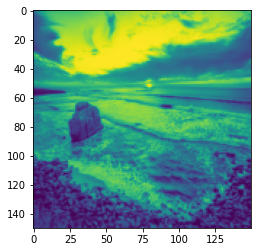

In [14]:
flat_data = []
url = input('Enter URL: ')
img = cv2.cvtColor(imread(url), cv2.COLOR_BGR2GRAY)
img_resized = resize(img,(150,150))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
print(f'Predicted output: {y_out[0]}')